### Agregando nuestras dependencias

In [14]:
import numpy as np 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt

### Importando nuestro dataframe

In [15]:
df = pd.read_csv("pizza.csv")
df.head()

,Empresa,Precio,N_pepp
0,Feedbug,14.08,8.10
1,Dabtype,9.76,4.30
2,Ntag,4.89,2.20
3,Twimm,7.71,4.30
4,Youfeed,5.34,3.16


### Removiendo la columna de marca

In [16]:
df = df.drop(['Empresa'], axis=1)
df.head()

,Precio,N_pepp
0,14.08,8.10
1,9.76,4.30
2,4.89,2.20
3,7.71,4.30
4,5.34,3.16


### Gráfica de nuestro DF

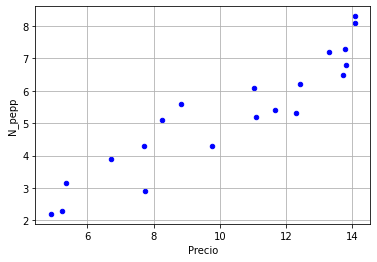

In [17]:
df.plot(kind='scatter',x='Precio',y='N_pepp',color='blue')
plt.grid(True, which='both')
plt.show()

### Estandarizando el dataframe

In [18]:
from sklearn.preprocessing import StandardScaler
df_std = StandardScaler().fit_transform(df)
df_std

array([[ 1.2081948 ,  1.57752299],
       [-0.16677926, -0.56953552],
       [-1.71680788, -1.75606786],
       [-0.81925537, -0.56953552],
       [-1.57358142, -1.21365307],
       [ 1.12225892,  0.84300297],
       [-0.64420081, -0.1175232 ],
       [ 0.2533517 , -0.06102166],
       [-1.60859233, -1.69956632],
       [ 0.95356997,  1.06900913],
       [ 0.64165456, -0.00452012],
       [ 0.67984828,  0.50399373],
       [-1.13753641, -0.79554168],
       [ 0.23743765,  0.44749219],
       [-0.46914624,  0.1649845 ],
       [ 1.11271049,  1.12551067],
       [ 1.20501199,  1.69052607],
       [ 1.09679643,  0.67349835],
       [ 0.43477189,  0.05198142],
       [-0.80970694, -1.36055708]])

### Gráfico estandarizado

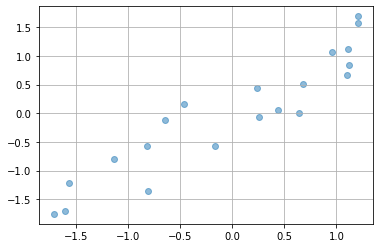

In [19]:
x_axis = [x[0] for x in df_std]
y_axis = [y[1] for y in df_std]

plt.scatter(x_axis, y_axis, alpha=0.5)
plt.grid(True, which='both')
plt.show()

### Cálculo de la matriz de covarianza

Esta es una matriz asimétrica que en la diagonal contiene la varianza(x) en y en los demás elementos contiene la covarianza(x,y)

In [20]:
df_cov_matrix = np.cov(df_std.T)
df_cov_matrix

array([[1.05263158, 0.97777429],
       [0.97777429, 1.05263158]])

### Calculando eigenvectores y eigenvalores

Eigenvectores 
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]
Eigenvalores 
 [2.03040587 0.07485729]
[ 1.43571376 -1.43571376]
[0.0529321 0.0529321]


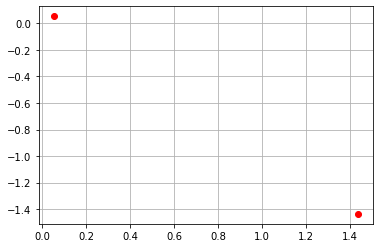

In [21]:
eig_vals, eig_vecs = np.linalg.eig(df_cov_matrix)

print('Eigenvectores \n', eig_vecs)
print('Eigenvalores \n', eig_vals)

first_eigencomposition = eig_vecs[0]*eig_vals[0]
second_eigencomposition = eig_vecs[1]*eig_vals[1]

print(first_eigencomposition)
print(second_eigencomposition)

x_axis = [first_eigencomposition[0], second_eigencomposition[0]]
y_axis = [first_eigencomposition[1], second_eigencomposition[1]]

plt.plot(x_axis,y_axis,'ro')
plt.grid(True, which='both')
plt.show()


### Varianza acumulada en cada componente

In [22]:
total = sum(eig_vals)
var_exp = [(i / total) for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Varianza de cada componente \n")
p = [print(v) for v in var_exp]
print("\nVarianza acumulada mientras avanzamos en cada componente \n")
p = [print(v) for v in cum_var_exp]

Varianza de cada componente 

0.9644427870697965
0.03555721293020358

Varianza acumulada mientras avanzamos en cada componente 

0.9644427870697965
1.0


### Gráfica de varianza acumulada por cada componente

[0.96444279 1.        ]


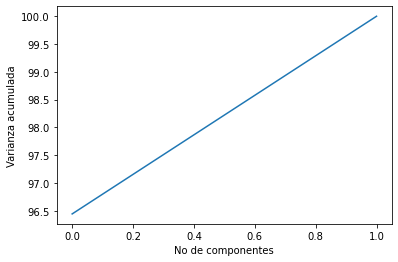

In [23]:
from sklearn.decomposition import PCA
pca = PCA().fit(df_std)
print(np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_*100))
plt.xlabel('No de componentes')
plt.ylabel('Varianza acumulada')
plt.show()

### Creando analisis de 1 sola componente

In [24]:
from sklearn.decomposition import PCA

df1 = pd.read_csv("pizza.csv")

pca = PCA(n_components = 1)
pcs = pca.fit_transform(df_std)
print(pcs)
df_new = pd.DataFrame(data=pcs, columns={'PC1'})

df_new['Empresa'] = df1['Empresa'] 
df_new

[[-1.96979994]
 [ 0.52065317]
 [ 2.45569399]
 [ 0.98202346]
 [ 1.97087241]
 [-1.38965001]
 [ 0.53862021]
 [-0.13599787]
 [ 2.33922141]
 [-1.4301794 ]
 [-0.45052208]
 [-0.83710272]
 [ 1.36689262]
 [-0.48431854]
 [ 0.21507483]
 [-1.58266136]
 [-2.04745459]
 [-1.25178745]
 [-0.34418656]
 [ 1.53460841]]


,PC1,Empresa
0,-1.969800,Feedbug
1,0.520653,Dabtype
2,2.455694,Ntag
3,0.982023,Twimm
4,1.970872,Youfeed
5,-1.389650,Gigashots
6,0.538620,Innojam
7,-0.135998,Meevee
8,2.339221,Vinte
9,-1.430179,Jaxbean
